# http://seaborn.pydata.org

- boxplot
- lmplot
- heatmap
- pairplot
- clustermap

In [14]:
import seaborn as sns
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt

### 1. plot

In [8]:
ts = Series(np.random.randn(1000),
           index = pd.date_range('1/1/2000', periods=1000)) # 기본값은 day이다

ts

2000-01-01   -0.006514
2000-01-02    0.348370
2000-01-03    0.528970
2000-01-04   -1.037557
2000-01-05    0.498017
                ...   
2002-09-22   -1.283110
2002-09-23    0.806482
2002-09-24    0.511687
2002-09-25   -0.745844
2002-09-26   -1.241530
Freq: D, Length: 1000, dtype: float64

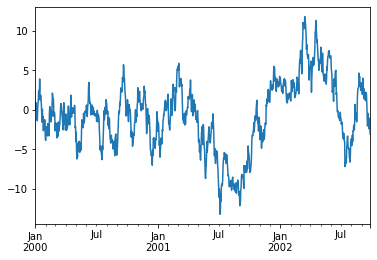

In [9]:
ts = ts.cumsum()
ts.plot()

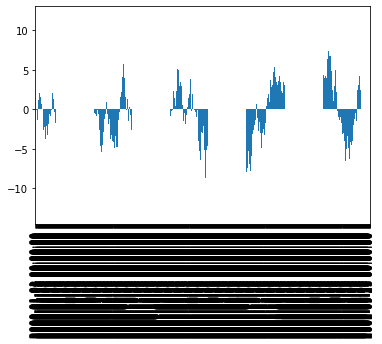

In [10]:
ts.plot(kind='bar') # 시간이 한참 걸린다.

In [12]:
x = np.linspace(0, 14, 100) # 0부터 14까지의 값을 100간격으로 쪼개서 만들어라
x
y = np.sin(x)
y

array([ 0.        ,  0.14094328,  0.27907268,  0.41163048,  0.53597023,
        0.64960951,  0.75027957,  0.83597055,  0.90497167,  0.95590534,
        0.98775469,  0.99988386,  0.99205069,  0.96441158,  0.91751832,
        0.85230712,  0.7700799 ,  0.67247831,  0.56145091,  0.43921435,
        0.30820902,  0.1710504 ,  0.03047682, -0.11070522, -0.24967706,
       -0.38366419, -0.5099916 , -0.6261372 , -0.72978219, -0.81885732,
       -0.89158426, -0.94651102, -0.98254101, -0.99895492, -0.99542503,
       -0.97202182, -0.92921254, -0.86785185, -0.78916479, -0.69472233,
       -0.58640998, -0.46639016, -0.33705902, -0.20099861, -0.06092533,
        0.0803643 ,  0.22004948,  0.35534146,  0.48353916,  0.60208317,
        0.7086068 ,  0.80098333,  0.87736852,  0.93623734,  0.9764145 ,
        0.99709789,  0.99787456,  0.97872901,  0.94004348,  0.8825903 ,
        0.8075165 ,  0.71632092,  0.61082424,  0.49313267,  0.36559587,
        0.23076008,  0.09131724, -0.04994872, -0.19021747, -0.32

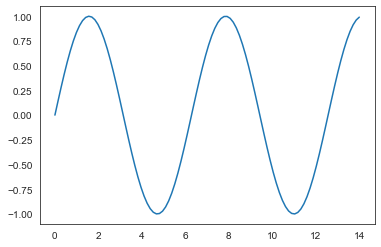

In [15]:
sns.set_style('white')
plt.plot(x, y)
plt.show()

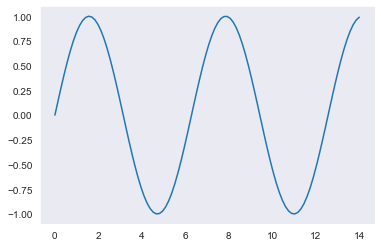

In [16]:
sns.set_style('dark')
plt.plot(x, y)
plt.show()

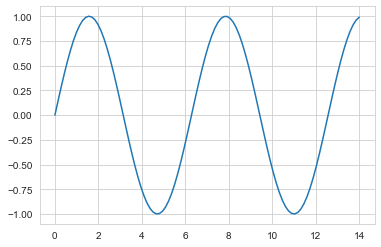

In [30]:
sns.set_style('whitegrid')
plt.plot(x, y)
plt.show()

### 2. Boxplot

In [31]:
# 0부터 100까지의 숫자 총 101개를 만든다.
xs = np.array(np.linspace(start=0, stop=100, num=101))
xs

df = DataFrame(xs, columns=['features'])
df

,features
0,0.0
1,1.0
2,2.0
3,3.0
4,4.0
...,...
96,96.0
97,97.0
98,98.0
99,99.0


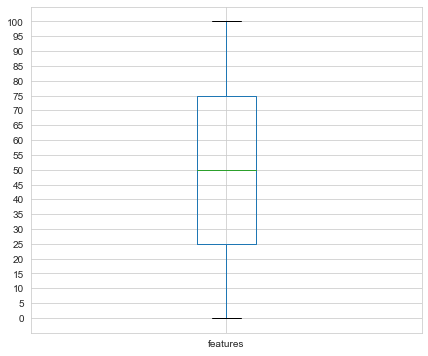

In [32]:
# 위의 데이터프레임을 Boxplot으로 나타내보겠다...boxplot
# 4분위를 나타냄

plt.figure(figsize=(7,6)) # 그래프 사이즈 지정
boxplot = df.boxplot(column=['features'])

plt.yticks(np.arange(0,101, step=5)) # y축의 간격 세밀 조정
plt.show()

### 실전 데이터 응용

In [33]:
# seaborn 에는 제공되는 여러 데이터가 있음
tips = sns.load_dataset('tips') 
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


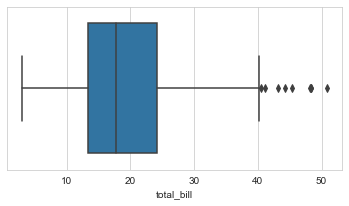

In [42]:
# boxplot()을 사용...음식지출액의 중간값과 이상치값?
plt.figure(figsize=(6,3))

# sns.boxplot(x=tips['total_bill'])
sns.boxplot(x='total_bill', data=tips)

plt.show()

In [35]:
tips.sort_values(by=['total_bill'], ascending=False)

,total_bill,tip,sex,smoker,day,time,size
170,50.81,10.00,Male,Yes,Sat,Dinner,3
212,48.33,9.00,Male,No,Sat,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4
156,48.17,5.00,Male,No,Sun,Dinner,6
182,45.35,3.50,Male,Yes,Sun,Dinner,3
...,...,...,...,...,...,...,...
149,7.51,2.00,Male,No,Thur,Lunch,2
111,7.25,1.00,Female,No,Sat,Dinner,1
172,7.25,5.15,Male,Yes,Sun,Dinner,2
92,5.75,1.00,Female,Yes,Fri,Dinner,2


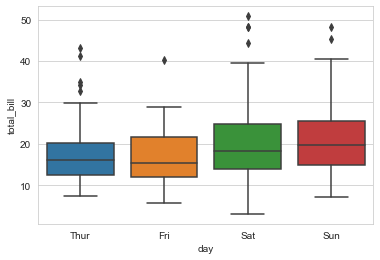

In [37]:
# 이번에는 날짜별로 음식지출액을 살펴보겠다.

sns.boxplot(x='day', y = 'total_bill', data=tips)

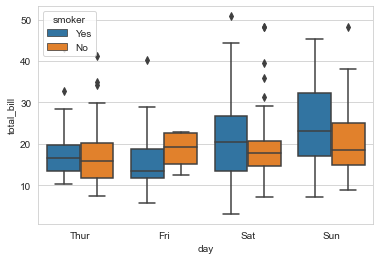

In [39]:
'''
hue : 서로 비교해서 살펴볼 대상이 있을때 사용...색상으로 대조해서 나타난다.

요일별. 흡연/비흡연자들의 전체 total_bill 을 알 수 있는 그래프

이상치 값의 경우 보통 제거해서 4분위만으로만 데이터 분석을 함.
'''
sns.boxplot(x = 'day', y='total_bill', hue='smoker', data=tips)

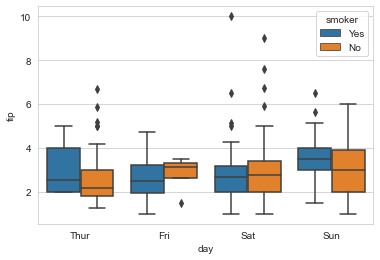

In [40]:
# 요일별. 흡연/비흡연자들의 tip 을 알 수 있는 그래프
sns.boxplot(x = 'day', y='tip', hue='smoker', data=tips)

### 3. lmplot

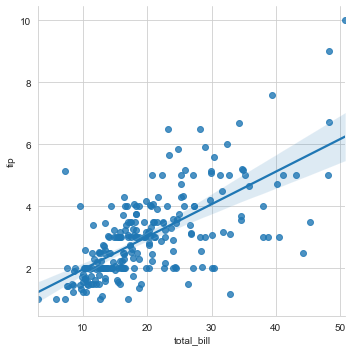

In [41]:
# 직선 : 비례 관계
# 점들이 모여 있는 곳 : 많이 분포된 곳

sns.lmplot(x='total_bill', y='tip', data=tips)

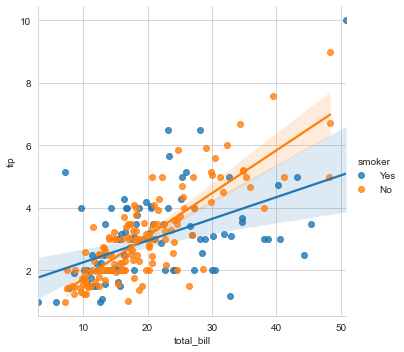

In [43]:
# tip을 더 많이 주는 사람들을 비흡연자라는 결론이 나온다.
# lmplot에서의 그림자 의미는? 
# 그림자처럼 표현된 곳은 데이터 분포에 대한 신뢰구간을 표시한 것
# 출처: https://stricky.tistory.com/124 [The DataBase that i am good at]

sns.lmplot(x='total_bill', y='tip', hue='smoker', data=tips)

### 4. Heatmap

In [55]:
# 년도별 월별 비행기 탑승객수
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [56]:
# flights= flights.pivot_table(index=['month'], columns=['year'], values=['passengers'])
flights= flights.pivot_table(index='month', columns='year', values='passengers')
flights

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


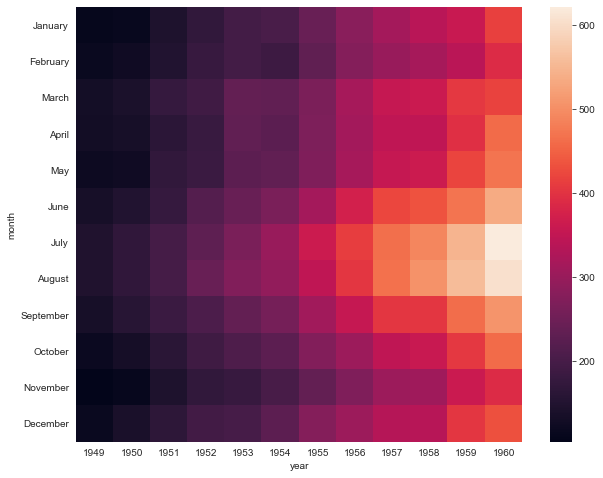

In [57]:
plt.figure(figsize=(10,8))
sns.heatmap(flights)
plt.show()

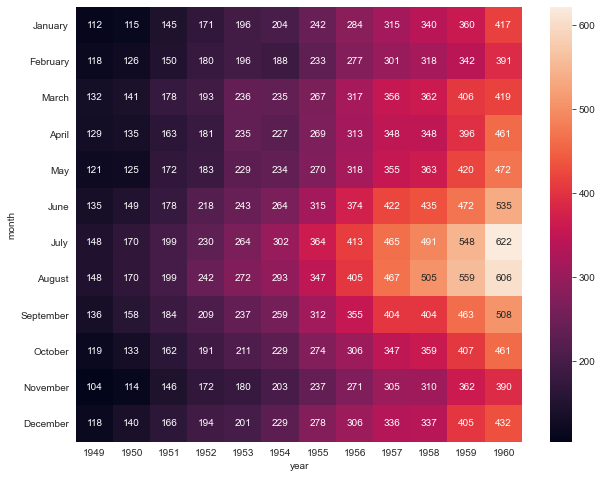

In [58]:
plt.figure(figsize=(10,8))
sns.heatmap(flights, annot=True, fmt='d') # annotation, formatting = 데시벌...정수값이 표시되도록
plt.show()